# Modelos de series de tiempo (ARIMA / SARIMAX / GARCH)

> Resumen práctico de propósito, componentes, supuestos, fortalezas, limitaciones, casos típicos y diagnósticos.

---

## ARIMA

**Propósito**
- Modelo lineal para series (diferenciadas) estacionarias; captura autocorrelaciones para pronosticar valores medios futuros.

**Componentes**
- \( p \): orden AR (autoregresivo)
- \( d \): número de diferencias integradas
- \( q \): orden MA (media móvil)
- Opción de constante (*drift*) si \( d \le 1 \)

**Supuestos**
- Serie estacionaria tras diferenciar \( d \) veces
- Relación lineal pasado–presente
- Errores i.i.d. y homocedásticos
- Polinomios AR/MA estables (raíces fuera de la unidad)

**Fortalezas**
- Sencillo e interpretable
- Efectivo en series univariantes sin varianza cambiante
- Amplio respaldo teórico (metodología Box–Jenkins)

**Limitaciones**
- Sin estacionalidad ni regresores externos (sin extensiones)
- Asume varianza constante (no modela volatilidad)
- Requiere serie suficientemente larga y estacionaria

**Casos típicos**
- Series económicas tras eliminar tendencia (p. ej., diferencias del log del PIB)
- Demografía, ventas desestacionalizadas
- Cuando interesa el pronóstico del nivel medio y no hay estacionalidad fuerte

**Cuándo no usar**
- Con estacionalidad periódica marcada (usar SARIMA)
- Si hay varianza no constante o *clustering* de volatilidad (considerar GARCH)
- Con datos muy escasos (riesgo de sobreajuste)

**Diagnósticos**
- ADF/KPSS para verificar estacionariedad
- ACF/PACF para identificar \( p, q \)
- Selección por AIC/BIC
- Test Ljung–Box en residuos (ruido blanco)
- Raíces AR/MA fuera del círculo unitario

---

## SARIMAX

**Propósito**
- Extensión de ARIMA que incorpora estacionalidad multiplicativa y variables exógenas.

**Componentes**
- Orden regular \((p,d,q)\) + estacional \((P,D,Q)_m\) (con \( m \) = periodicidad)
- Términos AR/MA estacionales a rezagos múltiplos de \( m \)
- Regresores exógenos con coeficientes \( \beta \)

**Supuestos**
- Serie estacionaria tras diferenciar \( d \) y \( D \) (tendencia y estacionalidad removidas)
- Estacionalidad con periodo fijo \( m \)
- Dinámica lineal
- Exógenos independientes del error
- Errores ~ ruido blanco homocedástico

**Fortalezas**
- Captura explícitamente la estacionalidad
- Permite incluir factores externos relevantes
- Muy flexible (ARIMA, ARIMAX y SARIMA son casos particulares)

**Limitaciones**
- Más parámetros → mayor riesgo de sobreajuste con pocos datos
- Identificación de \( m, P, Q \) requiere más análisis
- Mantiene supuestos de linealidad y varianza constante
- Para pronosticar, los exógenos también deben poder pronosticarse

**Casos típicos**
- Series con estacionalidad clara: ventas mensuales (\( m=12 \)), series trimestrales (\( m=4 \))
- Inclusión de variables externas (p. ej., demanda eléctrica con temperatura)

**Cuándo no usar**
- Sin estacionalidad significativa (preferir ARIMA)
- Si no habrá pronóstico de exógenos (difícil usar variables externas)
- Varianza muy no constante (puede requerir un modelo de volatilidad adicional)

**Diagnósticos**
- ADF estacional (raíz unitaria en frecuencia estacional)
- ACF/PACF tras diferenciar estacionalmente
- AIC/BIC para seleccionar órdenes
- Ljung–Box en residuos (incluyendo rezagos \( m \))
- ARCH–LM en residuos para verificar necesidad de GARCH

---

## GARCH

**Propósito**
- Modelar la **volatilidad condicional** (varianza) de la serie en lugar de su media; captura agrupamientos de alta/baja varianza.

**Componentes**
- Varianza condicional:  
  \[
  \sigma_t^2 \;=\; \omega \;+\; \sum_{i=1}^{p}\alpha_i\,\varepsilon_{t-i}^2 \;+\; \sum_{j=1}^{q}\beta_j\,\sigma_{t-j}^2
  \]
- Variantes: **EGARCH** (log-\(\sigma^2\), asimetría *leverage*), **GJR** (umbral para choques negativos)

**Supuestos**
- Serie base (residuos o retornos) covarianza-estacionaria
- Presencia de heterocedasticidad condicional
- \(\varepsilon_t = \sigma_t z_t\) con \( z_t \) i.i.d. (Normal o t)
- Restricciones típicas: \( \alpha, \beta \ge 0 \), \( \sum \alpha + \sum \beta < 1 \) (estacionariedad)

**Fortalezas**
- Captura bien la dinámica de volatilidad (finanzas)
- Pronóstico de intervalos de confianza variables en el tiempo
- GARCH(1,1) suele funcionar bien en muchas series financieras
- Combinable con modelos de media (ARIMA)

**Limitaciones**
- No modela la media (necesita complemento si hay estructura en media)
- Estimación numéricamente compleja y sensible a la distribución
- Requiere muchas observaciones
- No capta bien choques extremos exógenos

**Casos típicos**
- Retornos financieros (acciones, FX) con volatilidad agrupada
- Inflación o tasas con variabilidad cambiante
- Gestión de riesgo (p. ej., VaR) donde importa predecir la varianza

**Cuándo no usar**
- Si los residuos no muestran autocorrelación en los cuadrados (sin efecto ARCH)
- Si solo interesa la predicción puntual de la media y la varianza es estable
- Series muy cortas o con varianza estable en todo el periodo

**Diagnósticos**
- Test ARCH–LM en residuos
- Comparar AIC/BIC de órdenes \( p,q \)
- Verificar significancia de \( \alpha_i, \beta_j \) y que \( \alpha+\beta < 1 \)
- Residuos estandarizados: Q-test en \( z_t \) y \( z_t^2 \)
- En modelos asimétricos, comprobar coeficiente de asimetría (\( \gamma \)) significativo

---

## Árbol de decisión (guía rápida)

- **¿Heterocedasticidad?**  
  - **Sí:** Incluir **GARCH** (posiblemente junto con ARIMA/SARIMAX para la media).  
  - **No:** **ARIMA/SARIMAX** es suficiente respecto a la varianza.

- **¿Estacionalidad?**  
  - **Sí:** Usar **SARIMA/SARIMAX** con \((P,D,Q)_m\).  
  - **No:** Usar **ARIMA** (o **ARIMAX** si hay exógenos).

- **¿Variables exógenas relevantes?**  
  - **Sí:** **ARIMAX/SARIMAX** para incorporarlas.  
  - **No:** **ARIMA/SARIMA** con información endógena.

- **¿Objetivo principal: volatilidad/incertidumbre?**  
  - **Sí:** Combinar **ARIMA/SARIMAX** (media) + **GARCH** (varianza).  
  - **No:** **ARIMA/SARIMAX** basta si se asume varianza fija.

---


[*********************100%***********************]  1 of 1 completed


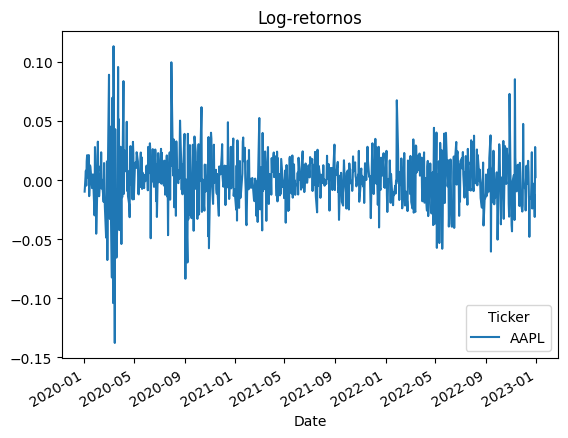

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

data = yf.download("AAPL", start="2020-01-01", end="2023-01-01",
                   auto_adjust=False, group_by='column')  # fuerza el esquema clásico
adj = data["Adj Close"]

log_returns = np.log(adj / adj.shift(1)).dropna()
log_returns.plot(title="Log-retornos")
plt.show()
